# Descrição dos dados:

### Nº de observações: 2.930
- Retirado mais de uma venda por casa, mantendo a mais recente
- Retirada vendas de garagens e armazens

### Nº de variáveis: 80
- 20 contínuas: Relacionadas à área da propriedade (total, cômodos, etc)
- 14 discretas: Quantidade de cômodos; Capacidade da garagem; Data de construção/reforma
- 23 nominais: Variam de 2 a 28 domínios, tendo informações de tipo de entrada da casa (asfaltada ou não), bairro, materiais utilizados na construção, etc.
- 23 ordinnais: Classificadores de qualidade de diversos locais da casa, em sua maioria com 8 domínios.

### Detalhamento:
- Variável 'PID' (Parcel Identification Number): Identificação da casa, pode ser consultada nos sites abaixo para por exemplo ver a foto da residência  
http://www.cityofames.org/assessor/ ou http://beacon.schneidercorp.com/  
- Variável 'NEIGHBORHOOD' (Bairro): Mais interessante utilizar dados geoespaciais:
https://ww2.amstat.org/publications/jse/v19n3/decock/AmesResidential.pdf  
- Documentação das variáveis:  
https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt 


In [1]:
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.utils import column_or_1d

In [175]:
data_1 = pd.read_csv('./train.csv')

In [3]:
x = data_1.describe()

In [4]:
HTML(x.to_html())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


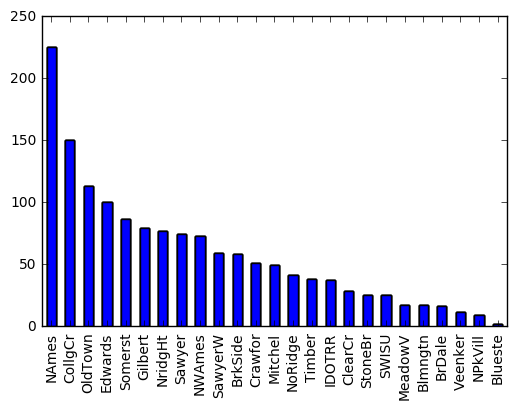

In [25]:
s = pd.DataFrame(data_1)
s.Neighborhood.value_counts().plot(kind='bar')
plt.show()

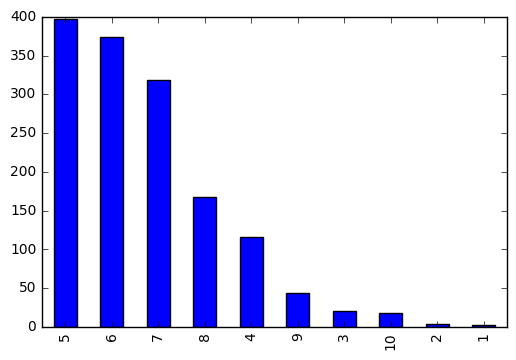

In [28]:
s = pd.DataFrame(data_1)
s.OverallQual.value_counts().plot(kind='bar')
plt.show()

In [34]:
HTML(s.select_dtypes(exclude=['floating']).head().to_html())

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
s = pd.DataFrame(data_1)
print(s)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

## Etapas
### 1. Descartar variáveis com missing > 50%
### 2. Preenchimento dos missings por mediana
### 3. Padronização de variáveis numéricas e ordinais
### 4. Agrupamento das variáveis categóricas em dummies
### 5. Rodar a regressão linear

In [22]:
#PORCENTAGEM DE MISSING PARA CADA VARIAVEL
tabela = pd.DataFrame(data_1)
x = pd.DataFrame(tabela.isnull().sum()/len(tabela))
HTML(x.to_html())

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,0.177397
LotArea,0.000000
Street,0.000000
Alley,0.937671
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [29]:
#remove colunas com missing maior que 50%
#preenche colunas numericas por mediana e categoricas por moda

tabela = pd.DataFrame(data_1)

def p_missing(x):
    if x.isnull().sum()/len(x) < 0.5:
        return True
    else:
        return False

def f_missing(x):
    if(x.dtype == np.float64 or x.dtype == np.int64):
        return x.fillna(x.median(), inplace=True)
    else:
        return x.fillna(x.mode()[0], inplace=True)
    
var_list = (tabela.apply(p_missing, axis=0))
tabela = tabela.loc[:, var_list]

for x in tabela.columns:
    f_missing(tabela[x])


In [103]:
#Remove colunas não numéricas
tabela = tabela.loc[:, tabela.dtypes != object]

tabela

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [105]:
#Cria dataset para treino, desconsiderando as 20 últimas linhas
tabela_treino_x = tabela.drop('SalePrice',1)[:-20]

In [106]:
#Cria dataset para teste, considerando apenas as últimas 20 linhas
tabela_validacao_x = tabela.drop('SalePrice',1)[-20:]

In [107]:
# Cria datasets com a variável resposta
tabela_treino_y = tabela.SalePrice[:-20]
tabela_validacao_y = tabela.SalePrice[-20:]

In [110]:
#regressao
regr = linear_model.LinearRegression()
regr.fit(tabela_treino_x, tabela_treino_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ -8.74127514e-01  -1.83910063e+02  -5.16101711e+01   4.27010307e-01
   1.72488397e+04   4.61412198e+03   2.70460522e+02   1.34663031e+02
   3.12930661e+01   9.96954683e+00  -1.31221806e+00   2.66619131e-02
   8.68399068e+00   1.73893285e+01   1.68620331e+01  -2.30171124e+00
   3.19496504e+01   9.52959113e+03   2.08821253e+03   3.49192859e+03
  -1.90209246e+03  -1.03129333e+04  -1.28211784e+04   5.26422144e+03
   3.85974846e+03   1.31192442e+02   1.12773119e+04  -4.43086922e+00
   2.51456853e+01  -3.62006298e+00   1.18543443e+01   1.92191135e+01
   5.63115045e+01  -2.90641212e+01  -1.01495182e+00   6.75917166e+00
  -8.27598141e+02]


In [113]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(tabela_validacao_x, tabela_validacao_y))

Variance score: 0.82


## Modelo V2 - Tratando missings e criando dummies para categoricas
### Variaveis numericas missing, preenchidas com ZERO
### Variaveis categoricas missing, mantidas com MISSING
#### Ao criar dummies, o pandas reconhece como missing apenas nas variaveis categoricas

In [176]:
#remove colunas com missing maior que 50%
#preenche colunas numericas por mediana e categoricas por moda

tabela = pd.DataFrame(data_1)

def p_missing(x):
    if x.isnull().sum()/len(x) < 0.5:
        return True
    else:
        return False

def f_missing(x):
    if(x.dtype == np.float64 or x.dtype == np.int64):
        return x.fillna(0, inplace=True)
    #else:
    #    return x.fillna(x.mode()[0], inplace=True)
    
var_list = (tabela.apply(p_missing, axis=0))
tabela = tabela.loc[:, var_list]

for x in tabela.columns:
    f_missing(tabela[x])



tabela_dum = pd.get_dummies(tabela, dummy_na = True)
x = pd.DataFrame(tabela_dum.isnull().sum()/len(tabela_dum))
HTML(x.to_html())

,0
Id,0.0
MSSubClass,0.0
LotFrontage,0.0
LotArea,0.0
OverallQual,0.0
OverallCond,0.0
YearBuilt,0.0
YearRemodAdd,0.0
MasVnrArea,0.0
BsmtFinSF1,0.0


In [177]:
#Criando base aleatoria de treino e validacao

train, test = train_test_split(tabela_dum, random_state = 1234, test_size = 0.3)

In [178]:
# Separando os eixos X (variaveis explicativas) e Y (variavel resposta) das duas bases

train_x = train.drop(['SalePrice','Id'],1)
test_x = test.drop(['SalePrice','Id'], 1)

train_y = pd.DataFrame(train.loc[:,'SalePrice'])
test_y = pd.DataFrame(test.loc[:,'SalePrice'])

#train_y = train.loc[:,'SalePrice']
#test_y = test.loc[:,'SalePrice']

In [23]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# Explained variance score: 1 is perfect prediction
regr.score(test_x, test_y)

0.88106733734584275

In [179]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=130,fit_intercept=True)

train_x = train_x.reindex_axis(sorted(train_x.columns), axis=1)
test_x = test_x.reindex_axis(sorted(test_x.columns), axis=1)


res = lasso.fit(train_x,train_y)
res.score(test_x, test_y)

/Users/paulobuenobruno/estudo_k/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.90281121568179468

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=10)
rfs = rf.fit(train_x,train_y)
rfs.score(test_x,test_y)

/Users/paulobuenobruno/estudo_k/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.86078569333662969

In [44]:
[estimator.tree_.max_depth for estimator in rfs.estimators_]

[18,
 21,
 18,
 21,
 18,
 20,
 20,
 24,
 25,
 20,
 21,
 21,
 21,
 25,
 18,
 20,
 19,
 19,
 24,
 22,
 22,
 23,
 25,
 23,
 23,
 18,
 22,
 23,
 21,
 20,
 21,
 23,
 20,
 20,
 20,
 22,
 22,
 21,
 19,
 21,
 21,
 19,
 19,
 22,
 20,
 20,
 19,
 21,
 21,
 18,
 23,
 22,
 19,
 19,
 23,
 19,
 24,
 20,
 21,
 21,
 18,
 25,
 22,
 20,
 20,
 21,
 24,
 21,
 20,
 21,
 21,
 19,
 21,
 21,
 26,
 19,
 19,
 21,
 23,
 19,
 20,
 19,
 20,
 23,
 20,
 21,
 28,
 20,
 19,
 19,
 26,
 22,
 23,
 23,
 23,
 21,
 21,
 19,
 19,
 19,
 18,
 20,
 21,
 22,
 22,
 18,
 18,
 20,
 20,
 21,
 24,
 20,
 21,
 21,
 21,
 20,
 20,
 23,
 20,
 19,
 20,
 24,
 20,
 19,
 21,
 21,
 21,
 25,
 23,
 22,
 20,
 19,
 20,
 23,
 22,
 21,
 21,
 18,
 21,
 23,
 20,
 18,
 23,
 21,
 21,
 21,
 20,
 20,
 19,
 20,
 22,
 21,
 20,
 22,
 21,
 19,
 17,
 21,
 20,
 20,
 19,
 20,
 20,
 18,
 21,
 31,
 19,
 26,
 18,
 27,
 19,
 19,
 21,
 21,
 22,
 21,
 20,
 20,
 21,
 20,
 19,
 18,
 18,
 21,
 21,
 19,
 19,
 23,
 20,
 20,
 20,
 21,
 19,
 19,
 18,
 21,
 22,
 18,
 20,
 21,


## Primeira escoragem

In [237]:
data_2 = pd.read_csv('./test.csv')
tabela_2 = pd.DataFrame(data_2)

def f_missing(x):
    if(x.dtype == np.float64 or x.dtype == np.int64):
        return x.fillna(0, inplace=True)
    #else:
    #    return x.fillna(x.mode()[0], inplace=True)


tabela_2_dum = pd.get_dummies(tabela_2, dummy_na = True)
var_list_train = (train_x.columns)
tabela_2_dum = tabela_2_dum.loc[:, var_list_train]
tabela_2_dum = tabela_2_dum.reindex_axis(sorted(tabela_2_dum.columns), axis=1)
#train_x.head()
#tabela_2_dum.head()

for x in tabela_2_dum.columns:
    f_missing(tabela_2_dum[x])

x = pd.DataFrame(tabela_2_dum.isnull().sum()/len(tabela_2_dum))
HTML(x.to_html())

,0
1stFlrSF,0.0
2ndFlrSF,0.0
3SsnPorch,0.0
BedroomAbvGr,0.0
BldgType_1Fam,0.0
BldgType_2fmCon,0.0
BldgType_Duplex,0.0
BldgType_Twnhs,0.0
BldgType_TwnhsE,0.0
BldgType_nan,0.0


In [238]:
resposta = pd.DataFrame(res.predict(tabela_2_dum))

In [239]:
resposta['Id'] = tabela_2['Id']
resposta.columns = ['SalePrice', 'Id']
resposta = resposta.reindex_axis(sorted(resposta.columns), axis=1)
resposta

,Id,SalePrice
0,1461,120204.304358
1,1462,142568.412526
2,1463,181032.838082
3,1464,196573.474677
4,1465,198445.334560
5,1466,175675.982627
6,1467,184434.231342
7,1468,162035.548935
8,1469,211378.148345
9,1470,118574.886117


In [241]:
resposta.to_csv('resposta_1.csv', index = False)